In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0


In [2]:
#import csv file
import pandas as pd

data = pd.read_csv(r'D:\archive\sample\sample_labels.csv')

In [3]:
data

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139000,0.139000
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168000,0.168000
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168000,0.168000
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143000,0.143000
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168000,0.168000
...,...,...,...,...,...,...,...,...,...,...,...
5601,00030712_000.png,No Finding,0,30712,058Y,M,PA,2021,2021,0.194311,0.194311
5602,00030786_005.png,Cardiomegaly|Effusion|Emphysema,5,30786,061Y,F,AP,3056,2544,0.139000,0.139000
5603,00030789_000.png,Infiltration,0,30789,052Y,F,PA,2021,2021,0.194311,0.194311
5604,00030792_000.png,No Finding,0,30792,010Y,F,PA,1775,1712,0.194311,0.194311


In [4]:
print((data['Finding Labels']=='Infiltration').sum())

503


In [5]:
#check the numbers of labels(classes)
unique_classes = data['Finding Labels'].value_counts()
unique_classes

Finding Labels
No Finding                                                3044
Infiltration                                               503
Effusion                                                   203
Atelectasis                                                192
Nodule                                                     144
                                                          ... 
Atelectasis|Edema|Effusion|Infiltration|Pneumonia            1
Atelectasis|Consolidation|Edema|Infiltration|Pneumonia       1
Atelectasis|Effusion|Hernia                                  1
Atelectasis|Hernia|Pneumothorax                              1
Cardiomegaly|Effusion|Emphysema                              1
Name: count, Length: 244, dtype: int64

In [6]:
#ceate all images directory
images_dir = r'D:\archive\sample\sample\images'

In [7]:
# Define the function to load and preprocess images
def load_image(img_path, target_size=(224, 224)):
    img = Image.open(img_path).convert('RGB')
    img = img.resize(target_size)
    img = np.array(img)
    img = img / 255.0  # Normalize pixel values
    return img

In [8]:
from sklearn.preprocessing import MultiLabelBinarizer


In [9]:
# Load images and labels
images = []
labels = []

for index, row in data.iterrows():
    img_path = os.path.join(images_dir, row['Image Index'])
    img = load_image(img_path)
    images.append(img)
    labels.append(row['Finding Labels'].split('|'))
    #labels.append(labels)

# Convert images to a numpy array
images = np.array(images) #dtype=np.float32)

# Binarize the labels using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(labels)

# Convert labels to a numpy array
labels = np.array(labels)

# Display shapes of the datasets
print(f'Images shape: {images.shape}')
print(f'Labels shape: {labels.shape}')

# Optional: Display the binary matrix representation of labels
print("Binary matrix representation of all labels:")
print(labels)

Images shape: (5606, 224, 224, 3)
Labels shape: (5606, 15)
Binary matrix representation of all labels:
[[0 0 0 ... 1 0 1]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
#create dataframe of labels 
labels_df = pd.DataFrame(labels)

# Save DataFrame to CSV
labels_df.to_csv('labels.csv', index=False)

In [11]:
labels_df.columns = mlb.classes_

In [12]:
labels_df


,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1
1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5601,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5602,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0
5603,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5604,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [13]:
# Save DataFrame to CSV
labels_df.to_csv('labels.csv', index=False)

In [14]:
labels_df.columns.tolist()

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [15]:
print(f'Classes: {mlb.classes_}')
print(f'Encoded labels shape: {labels.shape}')

Classes: ['Atelectasis' 'Cardiomegaly' 'Consolidation' 'Edema' 'Effusion'
 'Emphysema' 'Fibrosis' 'Hernia' 'Infiltration' 'Mass' 'No Finding'
 'Nodule' 'Pleural_Thickening' 'Pneumonia' 'Pneumothorax']
Encoded labels shape: (5606, 15)


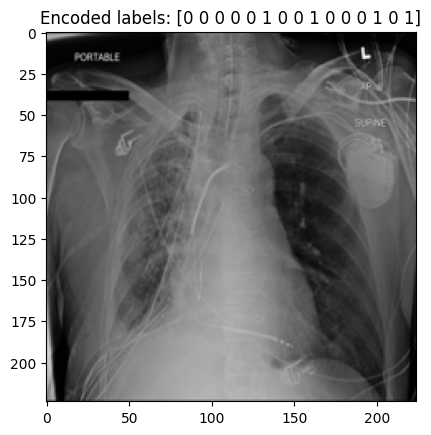

In [16]:
#function to show image with encoded labels 
def show_image_with_labels(img, label):
    plt.imshow(img)
    plt.axis
    #plt.figure(figsize=(2,2))
    plt.title(f'Encoded labels: {label}')
    plt.show()


show_image_with_labels(images[0], labels[0])

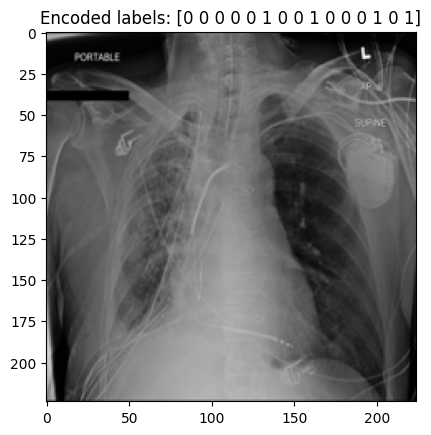

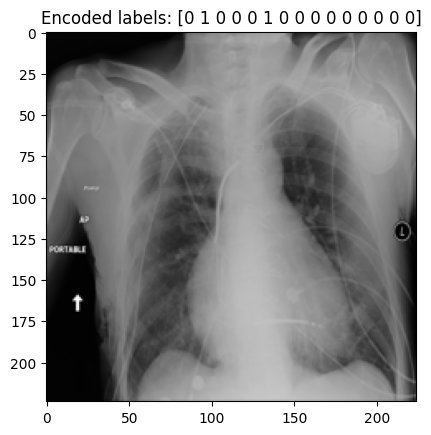

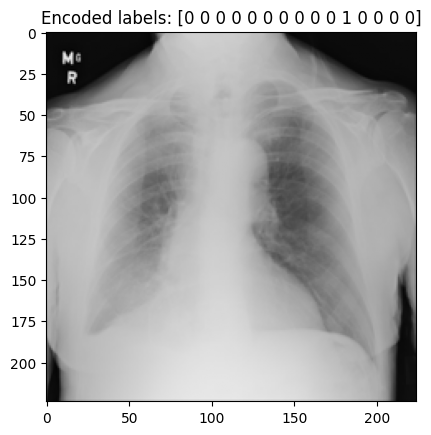

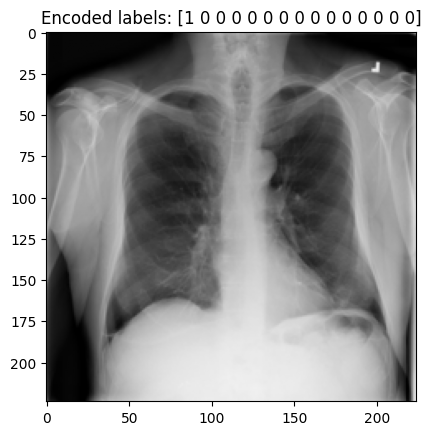

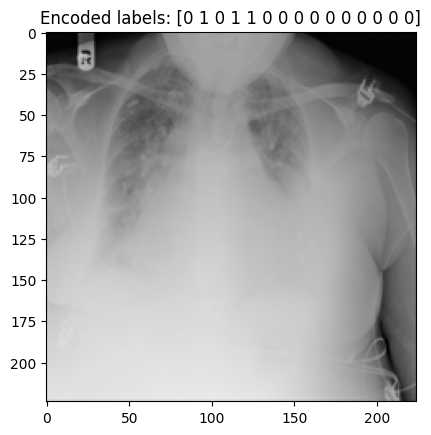

In [17]:
num_images_to_show = 5
for i in range(min(num_images_to_show, images.shape[0])):
    show_image_with_labels(images[i], labels[i])

In [ ]:
#from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Reshape images for RandomOverSampler
# num_samples, height, width, channels = images.shape
# images_reshaped = images.reshape((num_samples, height * width * channels))

# Function to resample in batches
# def resample_in_batches(images, labels, batch_size=2048):
#     images_resampled_list = []
#     labels_resampled_list = []
#     oversampler = RandomOverSampler(random_state=42)

#     for i in range(0, images.shape[0], batch_size):
#         images_batch = images[i:i+batch_size]
#         labels_batch = labels[i:i+batch_size]
#         images_resampled, labels_resampled = oversampler.fit_resample(images_batch, labels_batch)
#         images_resampled_list.append(images_resampled)
#         labels_resampled_list.append(labels_resampled)
    
#     images_resampled = np.concatenate(images_resampled_list, axis=0)
#     labels_resampled = np.concatenate(labels_resampled_list, axis=0)
#     return images_resampled, labels_resampled

# # Apply resampling in batches
# images_resampled, labels_resampled = resample_in_batches(images_reshaped, labels)

# # Reshape images_resampled back to the original image shape
# images_resampled = images_resampled.reshape((images_resampled.shape[0], height, width, channels))

# # Ensure unique resampled data
# _, unique_indices = np.unique(X_resampled, axis=0, return_index=True)
# images_resampled = images_resampled[unique_indices]
# labels_resampled = labels_resampled[unique_indices]

In [18]:
#split the data in train test
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Display the shapes of the splits
print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')

Training data shape: (4484, 224, 224, 3)
Testing data shape: (1122, 224, 224, 3)


In [19]:
X_train

array([[[[0.01176471, 0.01176471, 0.01176471],
         [0.01176471, 0.01176471, 0.01176471],
         [0.00784314, 0.00784314, 0.00784314],
         ...,
         [0.87058824, 0.87058824, 0.87058824],
         [0.88627451, 0.88627451, 0.88627451],
         [0.90588235, 0.90588235, 0.90588235]],

        [[0.01176471, 0.01176471, 0.01176471],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         ...,
         [0.42352941, 0.42352941, 0.42352941],
         [0.43921569, 0.43921569, 0.43921569],
         [0.4627451 , 0.4627451 , 0.4627451 ]],

        [[0.01176471, 0.01176471, 0.01176471],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         ...,
         [0.04705882, 0.04705882, 0.04705882],
         [0.05490196, 0.05490196, 0.05490196],
         [0.0627451 , 0.0627451 , 0.0627451 ]],

        ...,

        [[0.15294118, 0.15294118, 0.15294118],
         [0.1372549 , 0.1372549 , 0.1372549 ]

In [20]:
#create a cnn modeland compile
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(mlb.classes_), activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [21]:
#data augmentation 
datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

# Fit the data generator on the training data
datagen.fit(X_train)

In [ ]:
# Calculate Class Weights (to improve accuracy)
# from sklearn.utils.class_weight import compute_class_weight

# # Flatten the labels
# flat_y_train = np.argmax(y_train, axis=1)

# # Compute class weights
# class_weights = compute_class_weight('balanced', classes=np.unique(flat_y_train), y=flat_y_train)
# class_weights_dict = dict(enumerate(class_weights))

# # If using multi-label binarized form
# class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}


In [22]:
#fit model 
batch_size = 20
epochs = 10

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    #class_weight=class_weights_dict
)

Epoch 1/10
224/224 [==============================] - 333s 1s/step - loss: 0.2526 - accuracy: 0.4951 - val_loss: 0.2246 - val_accuracy: 0.5401
Epoch 2/10
224/224 [==============================] - 310s 1s/step - loss: 0.2259 - accuracy: 0.5410 - val_loss: 0.2179 - val_accuracy: 0.5401
Epoch 3/10
224/224 [==============================] - 307s 1s/step - loss: 0.2242 - accuracy: 0.5430 - val_loss: 0.2986 - val_accuracy: 0.5401
Epoch 4/10
224/224 [==============================] - 298s 1s/step - loss: 0.2214 - accuracy: 0.5435 - val_loss: 0.2930 - val_accuracy: 0.5401
Epoch 5/10
224/224 [==============================] - 294s 1s/step - loss: 0.2213 - accuracy: 0.5441 - val_loss: 0.2167 - val_accuracy: 0.5401
Epoch 6/10
224/224 [==============================] - 288s 1s/step - loss: 0.2203 - accuracy: 0.5435 - val_loss: 0.2157 - val_accuracy: 0.5401
Epoch 7/10
224/224 [==============================] - 289s 1s/step - loss: 0.2187 - accuracy: 0.5439 - val_loss: 0.2164 - val_accuracy: 0.5401

In [23]:
#evaluate te model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

36/36 [==============================] - 13s 325ms/step - loss: 0.2171 - accuracy: 0.5401
Test loss: 0.21707332134246826
Test accuracy: 0.5401069521903992


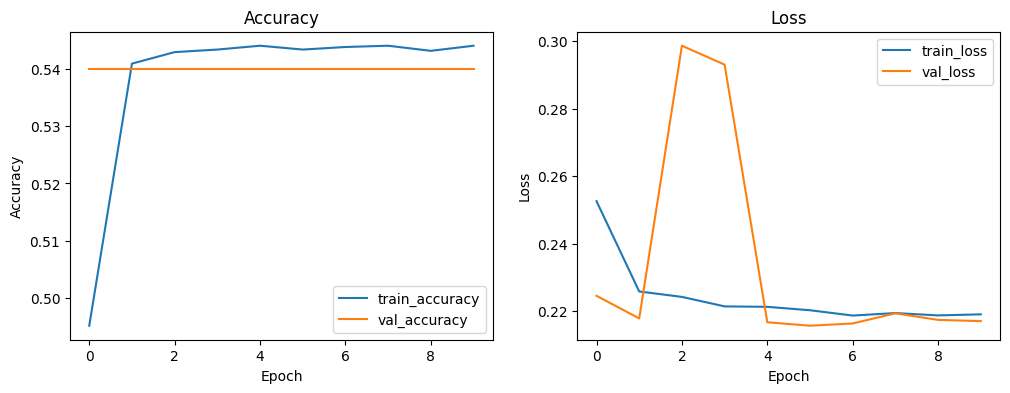

In [24]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [25]:
# Save the model
model.save('CNN_model.h5')


In [26]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('CNN_model.h5')


In [27]:
#preprocess on new data image and model prediction on new data
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image
    return img_array


In [29]:
# Path to the new image
new_image_path = r"D:\archive\sample\sample\images\00000080_005.png"

# Preprocess the image
img1_array = preprocess_image(new_image_path)

# Make prediction
prediction = model.predict(img1_array)

predicted_labels = mlb.inverse_transform(prediction > 0.5)
print(f'Predicted class: {predicted_labels}')


1/1 [==============================] - 0s 41ms/step
Predicted class: [('No Finding',)]


apply EfficientNETBo Architecture 

In [ ]:
# Load the EfficientNetB0 model pre-trained on ImageNet, excluding the top layers
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of the base model
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(len(mlb.classes_), activation='sigmoid')(x)

model1 = Model(inputs, outputs)

# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model1.summary()

In [ ]:
batch_size = 25
epochs = 10

history = model1.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs
)

In [ ]:
loss, accuracy = model1.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')